In [2]:
import json
import requests
from pprint import pprint
# from config import api_key
from pygments import highlight, lexers, formatters
import pandas as pd
#from flask import jsonify
from matplotlib import pyplot as plt
import numpy as np

from matplotlib.cm import viridis
from matplotlib.colors import to_hex

import gmaps
import gmaps.datasets
import gmaps.geojson_geometries

#from api_keys import g_key
gmaps.configure(api_key = '')

ModuleNotFoundError: No module named 'api_keys'

In [85]:
## Data from https://rapidapi.com/

# make a call to the URL 
url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api"

# pass key and host login
headers = {
    'x-rapidapi-host': "corona-virus-world-and-india-data.p.rapidapi.com",
    'x-rapidapi-key': ""
    }

# Store the information from the GET call into the "response" variable
response = requests.request("GET", url, headers=headers)
pprint(response.json())

# convert JSON into a python dictorinary format in order to read/loop through it.
# results = response.json()

# Print result to confirm
# pprint(results["countries_stat"])

# create for loop to get each result from countries stat which is the main key of the JSON
for key in results["countries_stat"]:
    print(key["country_name"])
    
    

{'countries_stat': [{'active_cases': '715,177',
                     'cases': '846,692',
                     'country_name': 'USA',
                     'deaths': '47,537',
                     'deaths_per_1m_population': '144',
                     'new_cases': '27,948',
                     'new_deaths': '2,219',
                     'region': '',
                     'serious_critical': '14,016',
                     'tests_per_1m_population': '13,052',
                     'total_cases_per_1m_population': '2,558',
                     'total_recovered': '83,978',
                     'total_tests': '4,320,329'},
                    {'active_cases': '100,757',
                     'cases': '208,389',
                     'country_name': 'Spain',
                     'deaths': '21,717',
                     'deaths_per_1m_population': '464',
                     'new_cases': '4,211',
                     'new_deaths': '435',
                     'region': '',
                     's

                     'deaths_per_1m_population': '0.3',
                     'new_cases': '20',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '2',
                     'tests_per_1m_population': '345',
                     'total_cases_per_1m_population': '15',
                     'total_recovered': '105',
                     'total_tests': '7,393'},
                    {'active_cases': '59',
                     'cases': '329',
                     'country_name': 'Mauritius',
                     'deaths': '9',
                     'deaths_per_1m_population': '7',
                     'new_cases': '1',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '3',
                     'tests_per_1m_population': '7,670',
                     'total_cases_per_1m_population': '259',
                     'total_recovered': '261',
                     'total_te

French Polynesia
Benin
Guinea-Bissau
Nepal
Macao
Syria
Mozambique
Eritrea
Saint Martin
Mongolia
Chad
Eswatini
Zimbabwe
Angola
Antigua and Barbuda
Malawi
Timor-Leste
Botswana
Laos
Belize
Fiji
New Caledonia
Dominica
Namibia
Grenada
Saint Lucia
Saint Kitts and Nevis
Curaçao
CAR
St. Vincent Grenadines
Burundi
Falkland Islands
Greenland
Montserrat
Seychelles
Turks and Caicos
Nicaragua
Gambia
Suriname
Vatican City
MS Zaandam
Papua New Guinea
Mauritania
Bhutan
St. Barth
Western Sahara
British Virgin Islands
Caribbean Netherlands
Sao Tome and Principe
South Sudan
Anguilla
Saint Pierre Miquelon
Yemen


In [86]:
results = response.json()
#print(results["countries_stat"])

In [87]:
# create a DataFrame from scratch (temporary to test)
pd.DataFrame(columns=["country_name"])

# create variable to hold the value belonging to each key in the dataset
countries = []
cases = []
deaths = []
active_cases = []
new_cases = []
new_deaths = []
total_recovered = []
serious_critical = []
deaths_per_1m_population = []
total_cases_per_1m_population = []
tests_per_1m_population = []

# total_tests = []

# for loop to store the data for each key
for key in results["countries_stat"]:
    countries.append(key["country_name"])
    cases.append(key["cases"])
    deaths.append(key["deaths"])
    new_deaths.append(key["new_deaths"])
    new_cases.append(key["new_cases"])
    active_cases.append(key["active_cases"])
    total_recovered.append(key["total_recovered"])
    serious_critical.append(key["serious_critical"])
    deaths_per_1m_population.append(key["deaths_per_1m_population"])
    total_cases_per_1m_population.append(key["total_cases_per_1m_population"])
    tests_per_1m_population.append(key['tests_per_1m_population'])
    #total_tests.append(key["total_tests"])
    
# print(countries)

In [88]:
# Store dataframe into variable permanent

data = pd.DataFrame(columns=["Country", "Total Cases", "Total Deaths", "New Deaths", "New Cases", "Active Cases", "Total Recovered", "Serious Critical", "Deaths Per 1m_population", "Total Cases Per 1m_population"])
data["Country"] = countries
data["Total Cases"] = cases
data["Total Deaths"] = deaths
data["New Deaths"] = new_deaths
data["New Cases"] = new_cases
data["Active Cases"] = active_cases
data["Total Recovered"] = total_recovered
data["Serious Critical"] = serious_critical
data["Deaths Per 1m_population"] = deaths_per_1m_population
data["Total Cases Per 1m_population"] = total_cases_per_1m_population
data["Test Conducted Per 1m_population"] = tests_per_1m_population
# data['Total tests'] = total_tests
data.head(10)


,Country,Total Cases,Total Deaths,New Deaths,New Cases,Active Cases,Total Recovered,Serious Critical,Deaths Per 1m_population,Total Cases Per 1m_population,Test Conducted Per 1m_population
0,USA,"846,692","47,537","2,219","27,948","715,177","83,978","14,016",144,"2,558","13,052"
1,Spain,"208,389","21,717",435,"4,211","100,757","85,915","7,705",464,"4,457","19,896"
2,Italy,"187,327","25,085",437,"3,370","107,699","54,543","2,384",415,"3,098","25,028"
3,France,"159,877","21,340",544,"1,827","97,880","40,657","5,218",327,"2,449","7,103"
4,Germany,"150,648","5,279",193,"2,195","45,969","99,400","2,908",63,"1,798","24,738"
5,UK,"133,495","18,100",763,"4,451","115,051",N/A,"1,559",267,"1,966","8,248"
6,Turkey,"98,674","2,376",117,"3,083","79,821","16,477","1,814",28,"1,170","8,904"
7,Iran,"85,996","5,391",94,"1,194","17,492","63,113","3,311",64,"1,024","4,493"
8,China,"82,788","4,632",0,30,"1,005","77,151",78,3,58,0
9,Russia,"57,999",513,57,"5,236","53,066","4,420",700,4,397,"15,418"


In [89]:
# use 06-Python-APIs/3/Activities/10-Stu_BankDeserts_Heatmap/Solved/Banking_Desert_HeatMap.ipynb
# for heatmap and plot chart

In [90]:
data.dtypes

Country                             object
Total Cases                         object
Total Deaths                        object
New Deaths                          object
New Cases                           object
Active Cases                        object
Total Recovered                     object
Serious Critical                    object
Deaths Per 1m_population            object
Total Cases Per 1m_population       object
Test Conducted Per 1m_population    object
dtype: object

In [96]:
pie_data=data.head(10).copy()
pie_data['Total Cases'] = pie_data['Total Cases'].str.replace(",","").astype(str).astype(int)
pie_data['Total Cases Per 1m_population'] = pie_data['Total Cases Per 1m_population'].str.replace(",","").astype(str).astype(int)
pie_data['Deaths Per 1m_population'] = pie_data['Deaths Per 1m_population'].str.replace(",","").astype(str).astype(int)
pie_data['Test Conducted Per 1m_population'] = pie_data['Test Conducted Per 1m_population'].str.replace(",","").astype(str).astype(int)

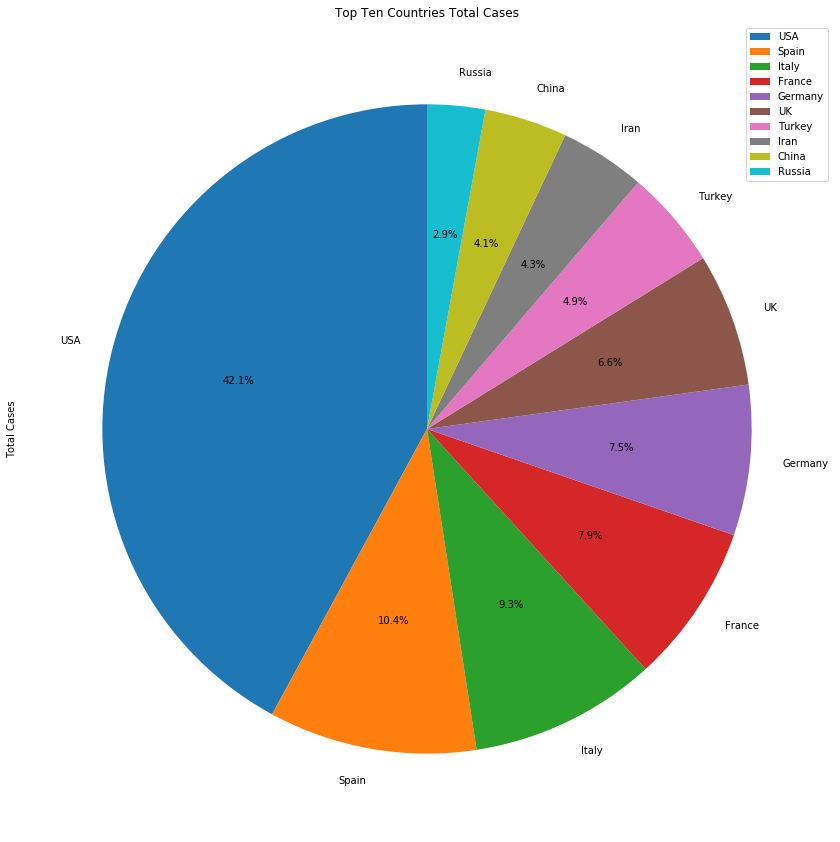

In [102]:
plt.figure(figsize=(32,16))
ax1=plt.subplot(121, aspect='equal')
pie_data.plot(kind='pie', y = 'Total Cases', title="Top Ten Countries Total Cases", ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=data['Country'])
plt.savefig('Top Ten Total Cases')

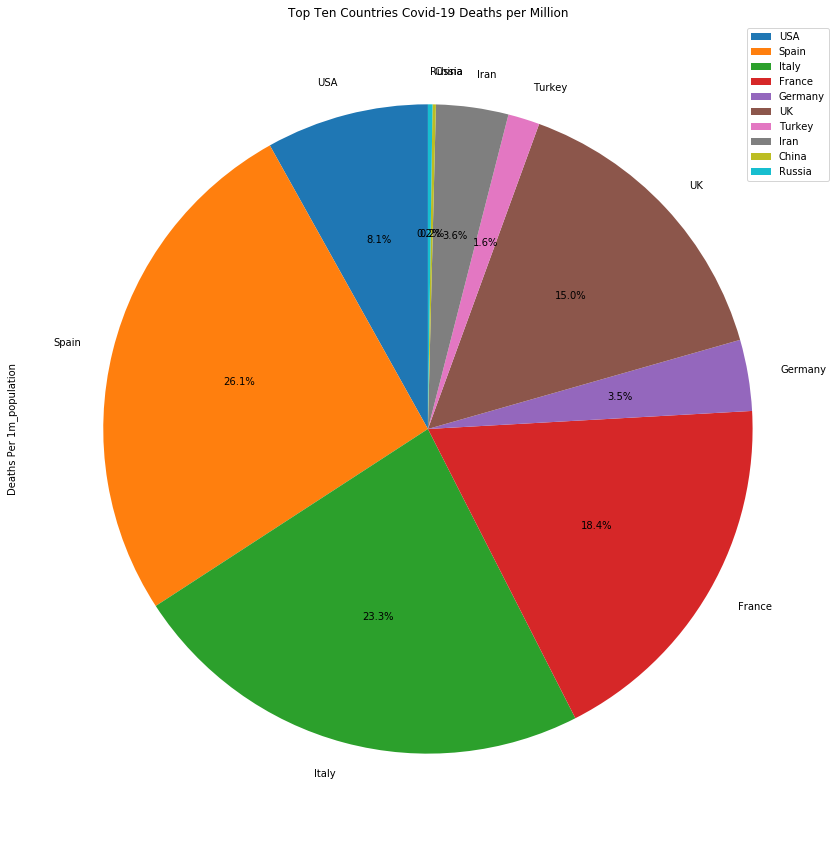

In [103]:

plt.figure(figsize=(32,16))
ax1=plt.subplot(121, aspect='equal')
pie_data.plot(kind='pie', y = 'Deaths Per 1m_population', title="Top Ten Countries Covid-19 Deaths per Million", ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=data['Country'])
plt.savefig('Top Ten Deaths Per Million')

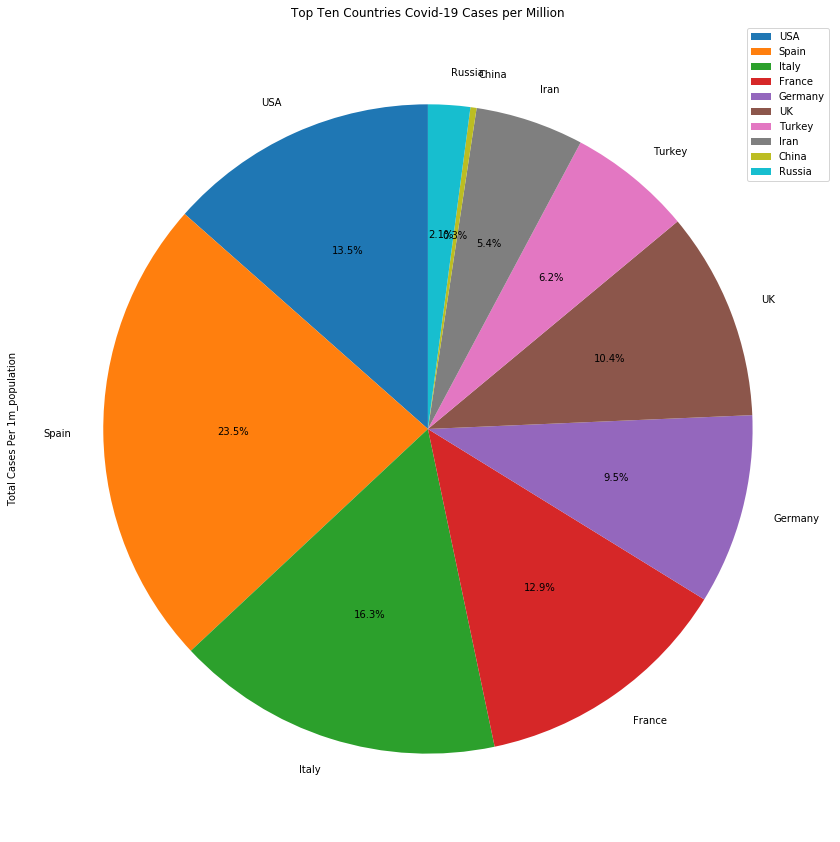

In [104]:
plt.figure(figsize=(32,16))
ax1=plt.subplot(121, aspect='equal')
pie_data.plot(kind='pie', y = 'Total Cases Per 1m_population', ax=ax1, title="Top Ten Countries Covid-19 Cases per Million", autopct='%1.1f%%', startangle=90, shadow=False, labels=data['Country'])
plt.savefig('Top Ten Cases Per Million')

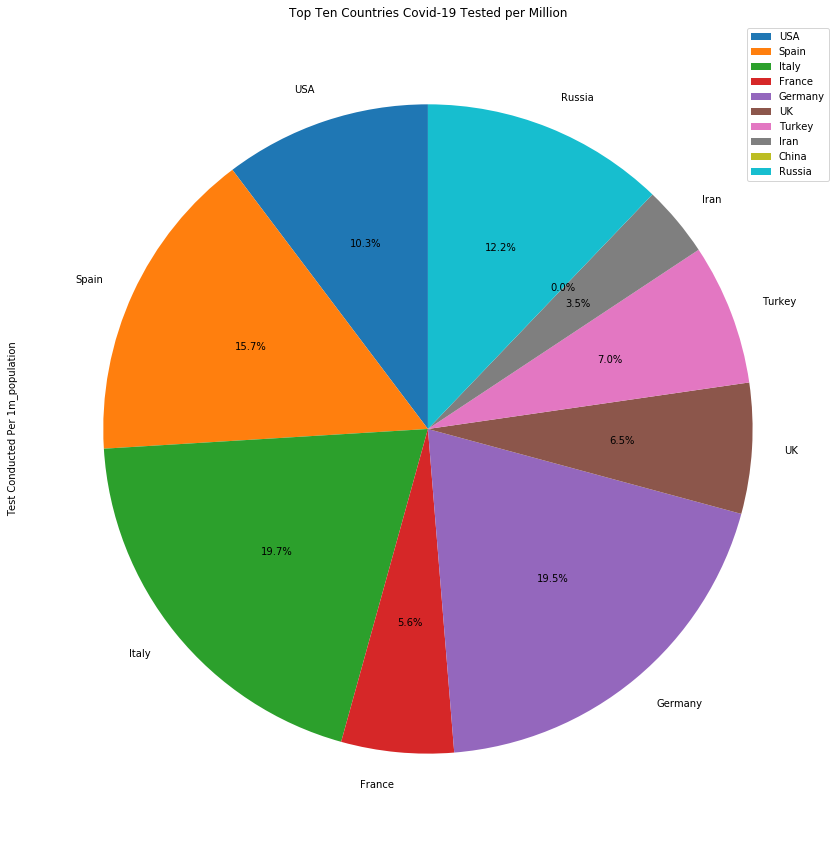

In [105]:
plt.figure(figsize=(32,16))
ax1=plt.subplot(121, aspect='equal')
pie_data.plot(kind='pie', y = 'Test Conducted Per 1m_population', ax=ax1, title="Top Ten Countries Covid-19 Tested per Million", autopct='%1.1f%%', startangle=90, shadow=False, labels=data['Country'])
plt.savefig('Top Ten Tested Per Million')